In [1]:
# import python library packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(style="darkgrid")

In [2]:
# upload Tapestry_patients file
# explore the first 800 rows
df = pd.read_csv('Analyst_Test_Tapestry_patients.csv')
df.head(10)

,Patient Unique ID,Birth Date,PRS,Gender,Subzone,Chronic Conditions
0,67130544,5/26/1974,0.70,Male,1d,0.0
1,73838640,8/31/1924,1.00,Male,4a_FO,5.0
2,73576382,2/8/1954,1.00,Female,2a_FO,6.0
3,74030096,3/15/1934,1.00,Female,2a_FO,6.0
4,73981356,5/18/1938,1.00,Female,2a_FO,7.0
5,67158130,12/13/1963,0.84,Female,5a,1.0
6,69321260,5/28/1992,0.50,Female,1d,3.0
7,67114010,6/1/1957,0.90,Male,4d,0.0
8,69624354,11/29/1970,0.80,Female,2b,0.0
9,68525938,7/11/1953,0.93,Female,4d,2.0


In [3]:
# explore the last 40 rows
df.tail(10)

,Patient Unique ID,Birth Date,PRS,Gender,Subzone,Chronic Conditions
834,71236110,1/28/1942,1.00,Male,2a_FO,NaN
835,67896832,12/10/1957,0.80,Female,2a,2.0
836,67916806,2/15/1943,0.67,Male,3b,NaN
837,68082912,1/15/1945,1.00,Female,2a,NaN
838,NaN,NaN,NaN,NaN,NaN,NaN
839,Business Analyst Test -Tapestry data set,NaN,NaN,NaN,NaN,NaN
840,"Copyright (c) 2000-2018 salesforce.com, inc. A...",NaN,NaN,NaN,NaN,NaN
841,Confidential Information - Do Not Distribute,NaN,NaN,NaN,NaN,NaN
842,Generated By: Alex Gerson 7/16/2018 11:39 AM,NaN,NaN,NaN,NaN,NaN
843,MedZed,NaN,NaN,NaN,NaN,NaN


In [4]:
# quick look at all the info in this dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 844 entries, 0 to 843
Data columns (total 6 columns):
Patient Unique ID     843 non-null object
Birth Date            838 non-null object
 PRS                  838 non-null float64
Gender                838 non-null object
Subzone               838 non-null object
Chronic Conditions    438 non-null float64
dtypes: float64(2), object(4)
memory usage: 39.7+ KB


In [5]:
# check for nan value
df.isnull().sum()

Patient Unique ID       1
Birth Date              6
 PRS                    6
Gender                  6
Subzone                 6
Chronic Conditions    406
dtype: int64

In [6]:
# quick look at statistical number for PRS & Chronic Conditions
df.describe()

,PRS,Chronic Conditions
count,838.000000,438.000000
mean,0.867100,4.940639
std,0.181986,2.164016
min,0.140000,0.000000
25%,0.750000,4.000000
50%,1.000000,5.000000
75%,1.000000,6.000000
max,1.000000,10.000000


In [7]:
# drop nan values
df.dropna(subset=None,inplace=True)

In [8]:
df.isnull().sum()

Patient Unique ID     0
Birth Date            0
 PRS                  0
Gender                0
Subzone               0
Chronic Conditions    0
dtype: int64

In [9]:
# check df again after cleaning
df

,Patient Unique ID,Birth Date,PRS,Gender,Subzone,Chronic Conditions
0,67130544,5/26/1974,0.70,Male,1d,0.0
1,73838640,8/31/1924,1.00,Male,4a_FO,5.0
2,73576382,2/8/1954,1.00,Female,2a_FO,6.0
3,74030096,3/15/1934,1.00,Female,2a_FO,6.0
4,73981356,5/18/1938,1.00,Female,2a_FO,7.0
...,...,...,...,...,...,...
829,62469082,5/6/1955,0.94,Female,3b,3.0
830,62576768,10/25/1980,0.82,Male,1b,2.0
831,60810988,1/9/1955,0.63,Female,1c,4.0
832,60854146,12/30/1899,0.54,Female,1c,2.0


In [10]:
df['Birth Date'].value_counts().sort_values().head()

1/20/1962     1
12/16/1932    1
8/5/1949      1
12/18/1949    1
10/30/1964    1
Name: Birth Date, dtype: int64

In [11]:
df['Birth Date'].sort_values().tail(10)

43     9/27/1943
107    9/27/1944
13     9/29/1986
801     9/5/1938
638     9/6/1944
39      9/6/1953
690     9/7/1935
785     9/7/1939
497     9/7/1965
239     9/8/1941
Name: Birth Date, dtype: object

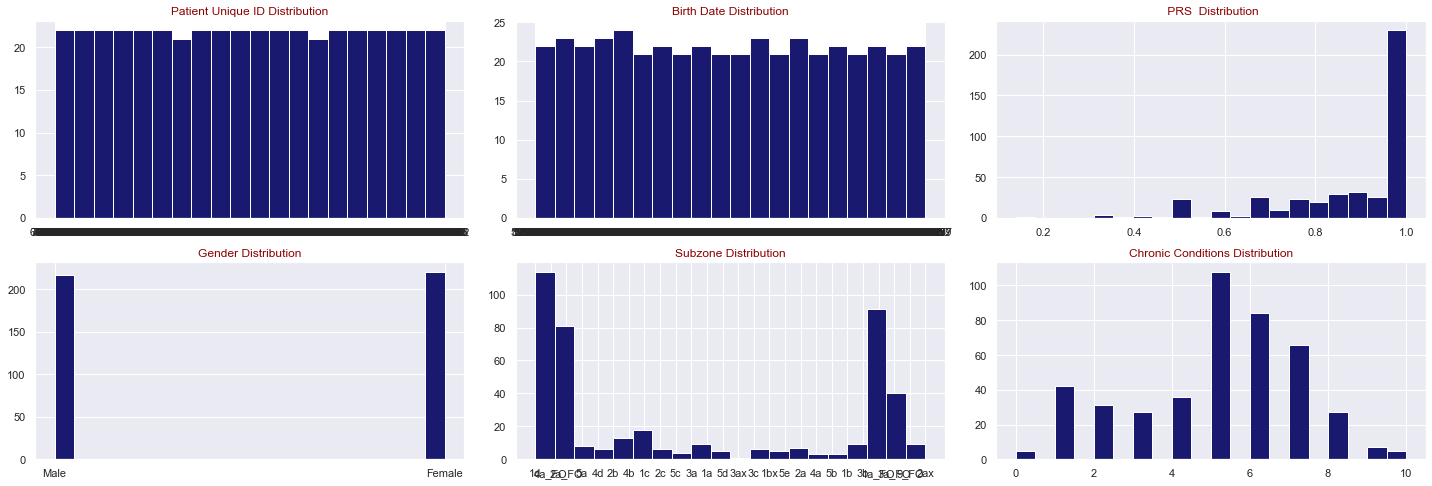

In [15]:
# plot features distribution
fig=plt.figure(figsize=(20,20))
columns_list = df.columns 
# Create for loop to navigate through the column list
for i, feature in enumerate(columns_list):
    ax=fig.add_subplot(6,3,i+1)
    df[feature].hist(bins=20,ax=ax,facecolor='midnightblue')
    ax.set_title(feature+" Distribution", color='DarkRed')
        
fig.tight_layout()  
plt.show()

#### Quick Note
* The patients in this dataset are very close in age
* Most of the patients are likely to keep their appts (PRS=1)
* Gender is equally distributed
* Chronic Condition has somewhat of a bell shape - indicating normal distribution

In [17]:
# convert birth date to age
import datetime as dt
ref_date = dt.datetime.now()
df['age'] = df['Birth Date'].apply(lambda x: len(pd.date_range(start = x, end = ref_date, freq = 'Y'))) 
df['age'].sort_values()

6       28
133     31
168     32
391     32
626     33
      ... 
640     95
1       96
245     98
225     99
832    121
Name: age, Length: 438, dtype: int64

In [18]:
df.head()

,Patient Unique ID,Birth Date,PRS,Gender,Subzone,Chronic Conditions,age
0,67130544,5/26/1974,0.7,Male,1d,0.0,46
1,73838640,8/31/1924,1.0,Male,4a_FO,5.0,96
2,73576382,2/8/1954,1.0,Female,2a_FO,6.0,66
3,74030096,3/15/1934,1.0,Female,2a_FO,6.0,86
4,73981356,5/18/1938,1.0,Female,2a_FO,7.0,82


In [45]:
# gender distribution
df['Gender'].value_counts()

Female    221
Male      217
Name: Gender, dtype: int64

In [20]:
# view the range of 'Chronic Conditions'
df['Chronic Conditions']

0      0.0
1      5.0
2      6.0
3      6.0
4      7.0
      ... 
829    3.0
830    2.0
831    4.0
832    2.0
835    2.0
Name: Chronic Conditions, Length: 438, dtype: float64

In [21]:
# count the sume of each category in Subzone
df['Subzone'].value_counts()

0         1d
1      4a_FO
2      2a_FO
3      2a_FO
4      2a_FO
       ...  
829       3b
830       1b
831       1c
832       1c
835       2a
Name: Subzone, Length: 438, dtype: object

In [27]:
# count the sum of each age
df['age'].value_counts()

76    21
66    16
82    16
85    16
71    15
      ..
92     1
95     1
96     1
98     1
28     1
Name: age, Length: 63, dtype: int64

In [58]:
# check for range of 'PRS'
df[' PRS '].value_counts()

1.00    223
0.67     26
0.50     23
0.88     17
0.75     16
0.80     14
0.83     12
0.86      9
0.94      8
0.89      7
0.92      7
0.93      7
0.60      5
0.78      5
0.96      5
0.71      4
0.81      4
0.91      4
0.85      4
0.33      4
0.90      4
0.84      3
0.73      3
0.95      3
0.70      3
0.97      2
0.57      2
0.82      1
0.45      1
0.63      1
0.40      1
0.14      1
0.58      1
0.38      1
0.77      1
0.62      1
0.54      1
0.87      1
0.44      1
0.79      1
0.76      1
Name:  PRS , dtype: int64

In [69]:
df = df.rename(columns={'Chronic Conditions':'Chronic_Conditions',' PRS ':'Patient_Reliability_Score'})
df.head()

,Patient Unique ID,Birth Date,Patient_Reliability_Score,Gender,Subzone,Chronic_Conditions,age
0,67130544,5/26/1974,0.7,Male,1d,0.0,46
1,73838640,8/31/1924,1.0,Male,4a_FO,5.0,96
2,73576382,2/8/1954,1.0,Female,2a_FO,6.0,66
3,74030096,3/15/1934,1.0,Female,2a_FO,6.0,86
4,73981356,5/18/1938,1.0,Female,2a_FO,7.0,82


In [72]:
df.head()

,Patient Unique ID,Birth Date,Patient_Reliability_Score,Gender,Subzone,Chronic_Conditions,age
0,67130544,5/26/1974,0.7,Male,1d,0.0,46
1,73838640,8/31/1924,1.0,Male,4a_FO,5.0,96
2,73576382,2/8/1954,1.0,Female,2a_FO,6.0,66
3,74030096,3/15/1934,1.0,Female,2a_FO,6.0,86
4,73981356,5/18/1938,1.0,Female,2a_FO,7.0,82


In [71]:
from sklearn import datasets, linear_model
from statsmodels.formula.api import ols

# Define the predictors and dependent variable
result = 'Patient_Reliability_Score'
x_cols=['Gender','age','Subzone','Chronic_Conditions']
# Build the model
predictors = '+'.join(x_cols)
formula = result + '~' + predictors
model= ols(formula=formula, data=df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                OLS Regression Results                               
=====================================================================================
Dep. Variable:     Patient_Reliability_Score   R-squared:                       0.087
Model:                                   OLS   Adj. R-squared:                  0.025
Method:                        Least Squares   F-statistic:                     1.393
Date:                       Sun, 23 Feb 2020   Prob (F-statistic):             0.0905
Time:                               09:38:08   Log-Likelihood:                 183.88
No. Observations:                        438   AIC:                            -309.8
Df Residuals:                            409   BIC:                            -191.4
Df Model:                                 28                                         
Covariance Type:                   nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              0.7879      0.076     10.362      0.000       0.638       0.937
Gender[T.Male]         0.0105      0.016      0.654      0.513      -0.021       0.042
Subzone[T.1a_FO]      -0.0192      0.068     -0.282      0.778      -0.153       0.114
Subzone[T.1b]         -0.0210      0.103     -0.203      0.839      -0.224       0.182
Subzone[T.1bx]        -0.1664      0.132     -1.260      0.208      -0.426       0.093
Subzone[T.1c]         -0.1285      0.074     -1.748      0.081      -0.273       0.016
Subzone[T.1d]         -0.0961      0.081     -1.182      0.238      -0.256       0.064
Subzone[T.2a]         -0.0571      0.088     -0.647      0.518      -0.231       0.116
Subzone[T.2a_FO]      -0.0366      0.069     -0.534      0.594      -0.171       0.098
Subzone[T.2ax]         0.0673      0.132      0.509      0.611      -0.193       0.327
Subzone[T.2b]         -0.0082      0.092     -0.089      0.929      -0.188       0.172
Subzone[T.2c]         -0.1388      0.092     -1.510      0.132      -0.320       0.042
Subzone[T.3a]         -0.1651      0.132     -1.250      0.212      -0.425       0.095
Subzone[T.3a_FO]      -0.0547      0.071     -0.769      0.442      -0.194       0.085
Subzone[T.3ax]         0.0276      0.176      0.156      0.876      -0.319       0.374
Subzone[T.3b]          0.0511      0.097      0.529      0.597      -0.139       0.241
Subzone[T.3c]         -0.0445      0.092     -0.484      0.628      -0.225       0.136
Subzone[T.4a]          0.0011      0.114      0.009      0.993      -0.223       0.225
Subzone[T.4a_FO]      -0.0343      0.068     -0.507      0.612      -0.167       0.099
Subzone[T.4b]          0.0371      0.088      0.421      0.674      -0.136       0.210
Subzone[T.4d]         -0.0305      0.092     -0.332      0.740      -0.211       0.150
Subzone[T.5a]         -0.0689      0.085     -0.808      0.420      -0.237       0.099
Subzone[T.5b]         -0.0482      0.114     -0.423      0.672      -0.272       0.175
Subzone[T.5c]          0.0315      0.103      0.305      0.761      -0.172       0.235
Subzone[T.5d]          0.0541      0.097      0.560      0.576      -0.136       0.244
Subzone[T.5e]         -0.2431      0.114     -2.135      0.033      -0.467      -0.019
Subzone[T.9_FO]        0.0209      0.091      0.228      0.819      -0.159       0.200
age                    0.0016      0.001      2.206      0.028       0.000       0.003
Chronic_Conditions     0.0025      0.005      0.479      0.632      -0.008       0.013
==============================================================================
Omnibus:                       99.384   Durbin-Watson:                   1.988
Prob(Omnibus):                  0.000   Jarque-Bera (JB):       

In [74]:
model2 = ols(formula = 'Patient_Reliability_Score ~ age + Gender + Subzone',
          data = df).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                OLS Regression Results                               
=====================================================================================
Dep. Variable:     Patient_Reliability_Score   R-squared:                       0.087
Model:                                   OLS   Adj. R-squared:                  0.026
Method:                        Least Squares   F-statistic:                     1.439
Date:                       Sun, 23 Feb 2020   Prob (F-statistic):             0.0742
Time:                               09:49:33   Log-Likelihood:                 183.75
No. Observations:                        438   AIC:                            -311.5
Df Residuals:                            410   BIC:                            -197.2
Df Model:                                 27                                         
Covariance Type:                   nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            0.7927      0.075     10.524      0.000       0.645       0.941
Gender[T.Male]       0.0106      0.016      0.662      0.508      -0.021       0.042
Subzone[T.1a_FO]    -0.0102      0.065     -0.156      0.876      -0.138       0.118
Subzone[T.1b]       -0.0229      0.103     -0.222      0.824      -0.226       0.180
Subzone[T.1bx]      -0.1684      0.132     -1.277      0.202      -0.428       0.091
Subzone[T.1c]       -0.1276      0.073     -1.738      0.083      -0.272       0.017
Subzone[T.1d]       -0.0978      0.081     -1.205      0.229      -0.257       0.062
Subzone[T.2a]       -0.0556      0.088     -0.631      0.529      -0.229       0.118
Subzone[T.2a_FO]    -0.0276      0.066     -0.419      0.675      -0.157       0.102
Subzone[T.2ax]       0.0716      0.132      0.543      0.587      -0.188       0.331
Subzone[T.2b]       -0.0059      0.091     -0.064      0.949      -0.186       0.174
Subzone[T.2c]       -0.1353      0.092     -1.478      0.140      -0.315       0.045
Subzone[T.3a]       -0.1684      0.132     -1.277      0.202      -0.428       0.091
Subzone[T.3a_FO]    -0.0457      0.068     -0.667      0.505      -0.180       0.089
Subzone[T.3ax]       0.0317      0.176      0.180      0.857      -0.314       0.378
Subzone[T.3b]        0.0524      0.096      0.544      0.587      -0.137       0.242
Subzone[T.3c]       -0.0410      0.092     -0.449      0.654      -0.221       0.139
Subzone[T.4a]       -0.0021      0.114     -0.018      0.985      -0.225       0.221
Subzone[T.4a_FO]    -0.0260      0.065     -0.398      0.691      -0.154       0.102
Subzone[T.4b]        0.0370      0.088      0.421      0.674      -0.136       0.210
Subzone[T.4d]       -0.0325      0.092     -0.355      0.723      -0.213       0.148
Subzone[T.5a]       -0.0703      0.085     -0.825      0.410      -0.238       0.097
Subzone[T.5b]       -0.0473      0.114     -0.416      0.677      -0.271       0.176
Subzone[T.5c]        0.0319      0.103      0.309      0.758      -0.171       0.235
Subzone[T.5d]        0.0540      0.096      0.560      0.576      -0.136       0.244
Subzone[T.5e]       -0.2446      0.114     -2.152      0.032      -0.468      -0.021
Subzone[T.9_FO]      0.0295      0.089      0.330      0.742      -0.146       0.205
age                  0.0016      0.001      2.235      0.026       0.000       0.003
==============================================================================
Omnibus:                      100.338   Durbin-Watson:                   1.987
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              170.251
Skew:                          -1.383   Prob(JB):                     1.07e-37
Kurtosis:                       4.295   Cond. No.      

In [80]:
model3 = ols(formula = 'Patient_Reliability_Score ~ age + Gender',
          data = df).fit()
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                OLS Regression Results                               
=====================================================================================
Dep. Variable:     Patient_Reliability_Score   R-squared:                       0.026
Model:                                   OLS   Adj. R-squared:                  0.022
Method:                        Least Squares   F-statistic:                     5.920
Date:                       Sun, 23 Feb 2020   Prob (F-statistic):            0.00291
Time:                               09:53:32   Log-Likelihood:                 169.81
No. Observations:                        438   AIC:                            -333.6
Df Residuals:                            435   BIC:                            -321.4
Df Model:                                  2                                         
Covariance Type:                   nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          0.7318      0.044     16.787      0.000       0.646       0.817
Gender[T.Male]     0.0095      0.016      0.602      0.548      -0.021       0.040
age                0.0020      0.001      3.376      0.001       0.001       0.003
==============================================================================
Omnibus:                      112.835   Durbin-Watson:                   2.005
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              206.780
Skew:                          -1.486   Prob(JB):                     1.25e-45
Kurtosis:                       4.579   Cond. No.                         399.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [82]:
model4 = ols(formula = 'Patient_Reliability_Score ~ age + Subzone',
          data = df).fit()
model4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                OLS Regression Results                               
=====================================================================================
Dep. Variable:     Patient_Reliability_Score   R-squared:                       0.086
Model:                                   OLS   Adj. R-squared:                  0.028
Method:                        Least Squares   F-statistic:                     1.480
Date:                       Sun, 23 Feb 2020   Prob (F-statistic):             0.0628
Time:                               09:55:13   Log-Likelihood:                 183.52
No. Observations:                        438   AIC:                            -313.0
Df Residuals:                            411   BIC:                            -202.8
Df Model:                                 26                                         
Covariance Type:                   nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            0.7990      0.075     10.702      0.000       0.652       0.946
Subzone[T.1a_FO]    -0.0112      0.065     -0.171      0.864      -0.139       0.117
Subzone[T.1b]       -0.0211      0.103     -0.204      0.838      -0.224       0.182
Subzone[T.1bx]      -0.1691      0.132     -1.284      0.200      -0.428       0.090
Subzone[T.1c]       -0.1283      0.073     -1.749      0.081      -0.273       0.016
Subzone[T.1d]       -0.1007      0.081     -1.243      0.214      -0.260       0.059
Subzone[T.2a]       -0.0602      0.088     -0.685      0.494      -0.233       0.112
Subzone[T.2a_FO]    -0.0282      0.066     -0.429      0.668      -0.158       0.101
Subzone[T.2ax]       0.0709      0.132      0.538      0.591      -0.188       0.330
Subzone[T.2b]       -0.0067      0.091     -0.073      0.942      -0.186       0.173
Subzone[T.2c]       -0.1360      0.091     -1.487      0.138      -0.316       0.044
Subzone[T.3a]       -0.1691      0.132     -1.284      0.200      -0.428       0.090
Subzone[T.3a_FO]    -0.0469      0.068     -0.685      0.494      -0.181       0.088
Subzone[T.3ax]       0.0363      0.176      0.207      0.836      -0.309       0.382
Subzone[T.3b]        0.0485      0.096      0.504      0.615      -0.141       0.238
Subzone[T.3c]       -0.0418      0.091     -0.457      0.648      -0.222       0.138
Subzone[T.4a]       -0.0011      0.114     -0.010      0.992      -0.224       0.222
Subzone[T.4a_FO]    -0.0261      0.065     -0.400      0.690      -0.154       0.102
Subzone[T.4b]        0.0370      0.088      0.421      0.674      -0.136       0.210
Subzone[T.4d]       -0.0350      0.091     -0.383      0.702      -0.215       0.145
Subzone[T.5a]       -0.0724      0.085     -0.851      0.395      -0.240       0.095
Subzone[T.5b]       -0.0498      0.113     -0.439      0.661      -0.273       0.173
Subzone[T.5c]        0.0286      0.103      0.277      0.782      -0.174       0.231
Subzone[T.5d]        0.0521      0.096      0.541      0.589      -0.137       0.241
Subzone[T.5e]       -0.2401      0.113     -2.117      0.035      -0.463      -0.017
Subzone[T.9_FO]      0.0311      0.089      0.349      0.728      -0.144       0.207
age                  0.0016      0.001      2.230      0.026       0.000       0.003
==============================================================================
Omnibus:                      101.500   Durbin-Watson:                   1.986
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              173.622
Skew:                          -1.391   Prob(JB):                     1.99e-38
Kurtosis:                       4.333   Cond. No.                     2.99e+03
=============================================================

In [84]:
model5 = ols(formula = 'Patient_Reliability_Score ~ Subzone',
          data = df).fit()
model5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                OLS Regression Results                               
=====================================================================================
Dep. Variable:     Patient_Reliability_Score   R-squared:                       0.075
Model:                                   OLS   Adj. R-squared:                  0.018
Method:                        Least Squares   F-statistic:                     1.327
Date:                       Sun, 23 Feb 2020   Prob (F-statistic):              0.136
Time:                               09:58:10   Log-Likelihood:                 180.89
No. Observations:                        438   AIC:                            -309.8
Df Residuals:                            412   BIC:                            -203.6
Df Model:                                 25                                         
Covariance Type:                   nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            0.8914      0.062     14.287      0.000       0.769       1.014
Subzone[T.1a_FO]     0.0111      0.065      0.171      0.864      -0.116       0.138
Subzone[T.1b]       -0.0314      0.103     -0.304      0.761      -0.235       0.172
Subzone[T.1bx]      -0.1664      0.132     -1.257      0.209      -0.427       0.094
Subzone[T.1c]       -0.1170      0.074     -1.591      0.112      -0.262       0.028
Subzone[T.1d]       -0.1054      0.081     -1.296      0.196      -0.265       0.054
Subzone[T.2a]       -0.0586      0.088     -0.664      0.507      -0.232       0.115
Subzone[T.2a_FO]    -0.0013      0.065     -0.020      0.984      -0.129       0.127
Subzone[T.2ax]       0.0736      0.132      0.556      0.579      -0.187       0.334
Subzone[T.2b]       -0.0098      0.092     -0.106      0.915      -0.190       0.171
Subzone[T.2c]       -0.1431      0.092     -1.558      0.120      -0.324       0.037
Subzone[T.3a]       -0.1664      0.132     -1.257      0.209      -0.427       0.094
Subzone[T.3a_FO]    -0.0199      0.068     -0.295      0.768      -0.153       0.113
Subzone[T.3ax]       0.0486      0.176      0.275      0.783      -0.298       0.395
Subzone[T.3b]        0.0506      0.097      0.523      0.601      -0.139       0.241
Subzone[T.3c]       -0.0364      0.092     -0.397      0.692      -0.217       0.144
Subzone[T.4a]       -0.0148      0.114     -0.130      0.897      -0.239       0.209
Subzone[T.4a_FO]     0.0009      0.064      0.014      0.989      -0.126       0.128
Subzone[T.4b]        0.0443      0.088      0.502      0.616      -0.129       0.218
Subzone[T.4d]       -0.0281      0.092     -0.306      0.760      -0.209       0.152
Subzone[T.5a]       -0.0677      0.085     -0.792      0.429      -0.236       0.100
Subzone[T.5b]       -0.0381      0.114     -0.334      0.738      -0.262       0.186
Subzone[T.5c]        0.0436      0.103      0.421      0.674      -0.160       0.247
Subzone[T.5d]        0.0406      0.097      0.420      0.675      -0.149       0.231
Subzone[T.5e]       -0.2448      0.114     -2.149      0.032      -0.469      -0.021
Subzone[T.9_FO]      0.0671      0.088      0.761      0.447      -0.106       0.241
==============================================================================
Omnibus:                       99.360   Durbin-Watson:                   1.970
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              167.510
Skew:                          -1.376   Prob(JB):                     4.22e-37
Kurtosis:                       4.267   Cond. No.                         44.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of

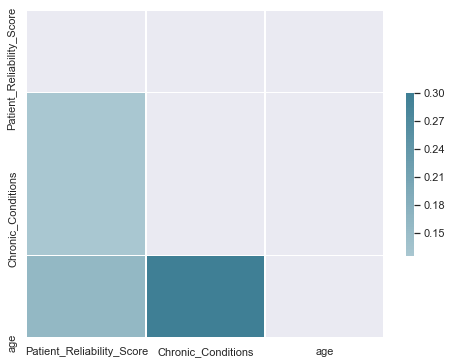

In [85]:
corr = df.corr()
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

fig, axs = plt.subplots(figsize=(8, 6))

cmap = sns.diverging_palette(1,222, as_cmap=True)

sns.heatmap(corr, mask=mask,cmap=cmap, vmax=.3,
            center=0, square=False,
            linewidths=.5, cbar_kws={"shrink": .5});